In [1]:
# This code snippet would help to access module of upper directory

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
print (sys.path)

from read_utils import load_one_param_file

a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
print (sys.path)



['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Tuan Do\\.ipython', 'D:\\git\\learn-to-perform']
['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Tuan Do\\.ipython', 'D:\\git\\learn-to-perform', 'D:\\git\\learn-to-perform\\strands_qsr_lib\\qsr_lib\\src3']


In [11]:
sys.path = ['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Tuan Do\\.ipython', 'D:\\git\\learn-to-perform', 'D:\\git\\learn-to-perform\\strands_qsr_lib\\qsr_lib\\src3']

In [4]:
from feature_util import qsr_feature_extractor

In [5]:
from utils import DATA_DIR, FIRST_EXPERIMENT_CLASSES,\
    SESSION_NAME, SESSION_OBJECTS, SESSION_EVENTS, GLYPH_BOX, NORMAL, \
    START, END, LABEL

In [6]:
session_data = load_one_param_file(os.path.join( DATA_DIR, 'SlideAround', 'Session1', 'files.param'))

'NoneType' object has no attribute 'findall'


In [7]:
import numpy as np

np.cross([0,0,1], [1,0,0])

array([0, 1, 0])

In [8]:
%matplotlib inline

from feature.project_table import project_markers, estimate_cube_2d
from simulator.utils import Cube2D, Transform2D
from matplotlib import pyplot as plt

def count_finite( numpy_array ):
    return np.sum( np.isfinite( numpy_array )) 

'''
Area of polygons
===========
Params: numpy_array of size ( 3 x n )

Return: object_data: Dictionary
'''
def area_dimension( numpy_array ):
    s = np.reshape(numpy_array, (len(numpy_array)//3,3))
    x = s[:,0]
    y = s[:,1]
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def project_to2d_ ( session_data ):
    object_data = {}

    for object_name in session_data[SESSION_OBJECTS]:
        if object_name == 'table':
            polygon = []
            for frameNo in session_data[SESSION_OBJECTS][object_name]:
                frame_polygon = session_data[SESSION_OBJECTS][object_name][frameNo]

            polygon.append(frame_polygon)

            polygon = np.concatenate(polygon)
            polygon = np.reshape(polygon, (len(polygon)//3, 3) )
            
            table_markers = polygon

            # Just pick the first two points for coordination
            first_point = table_markers[0]
            second_point = table_markers[1]
    
    for object_name in session_data[SESSION_OBJECTS]:
        if object_name != 'table':
            object_data[object_name] = {}
            for frameNo in session_data[SESSION_OBJECTS][object_name]:
                print (frameNo)
                frame_data = session_data[SESSION_OBJECTS][object_name][frameNo]

                # Sort firstly by number of non-finite corners
                # Sort secondly by size of marker (larger marker means better resolution)
                # Size of marker should be only based on first two dimensions
                # The third dimension might be very noisy
                q = [((count_finite(frame_data[face_index]), area_dimension(frame_data[face_index]) ), face_index) 
                    for face_index in frame_data]
                q = sorted(q, key = lambda t: t[0], reverse = True)

                # Pick out the face_index with the most number of non-infinite values
                best_face_index = q[0][1]
                #print ('-----------')
                #print (frame_data[best_face_index])
                rectangle_projected = project_markers ( frame_data[best_face_index], table_markers )
                #print (rectangle_projected)
                object_data[object_name][int(frameNo)] = estimate_cube_2d ( rectangle_projected, first_point, second_point )

    return object_data

def make_lines(shape):
    lines = []
    for i in range(len(shape)):
        j = (i + 1) % len(shape)
        lines.append( [ shape[i], shape[j] ] )
    
    return lines

colors = {'Shell': (1, 0, 0, 1), "Stella Artois" : (0,1,0,1) }

'''
Demo the movement of objects in a session from from_frame to to_frame (inclusive)
'''
#print (2)

object_data = project_to2d_(session_data)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in float_scalars



71
72
73
74
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
300
301
302
303
304
305
306
307
308
309
310
311
312
313
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346

D:\git\learn-to-perform\feature\project_table.py:112: RuntimeWarning: invalid value encountered in true_divide
  side /= norm(side)
C:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1804: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)



347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602

2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2260
2280
2281
2282
2311
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2411
2430
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514


In [7]:
print (object_data['Shell'][2].transform.position)
print (object_data['Shell'][2].transform.rotation)

[[ 0.13866424  0.41743544]]
1.415809321622445


In [9]:
import pylab as pl
from matplotlib import collections as mc

def plot (object_data, from_frame, to_frame):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(-2, 2, 0.1))
    ax.set_yticks(np.arange(-2, 2, 0.1))
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    fig.set_size_inches(20, 12)
    
    for object_name in object_data:
        data = object_data[object_name]
        
        for frameNo in data:
            if from_frame  <= frameNo <= to_frame :
                # Mistake
                # data[frameNo].transform.scale = data[frameNo].transform.scale / 2
                shape = data[frameNo].get_markers()
                
                lines = make_lines(shape)
                lc = mc.LineCollection(lines, colors=colors[object_name], linewidths=2)
                ax.add_collection(lc)


    ax.autoscale()
    ax.margins(0.1)

    plt.show()

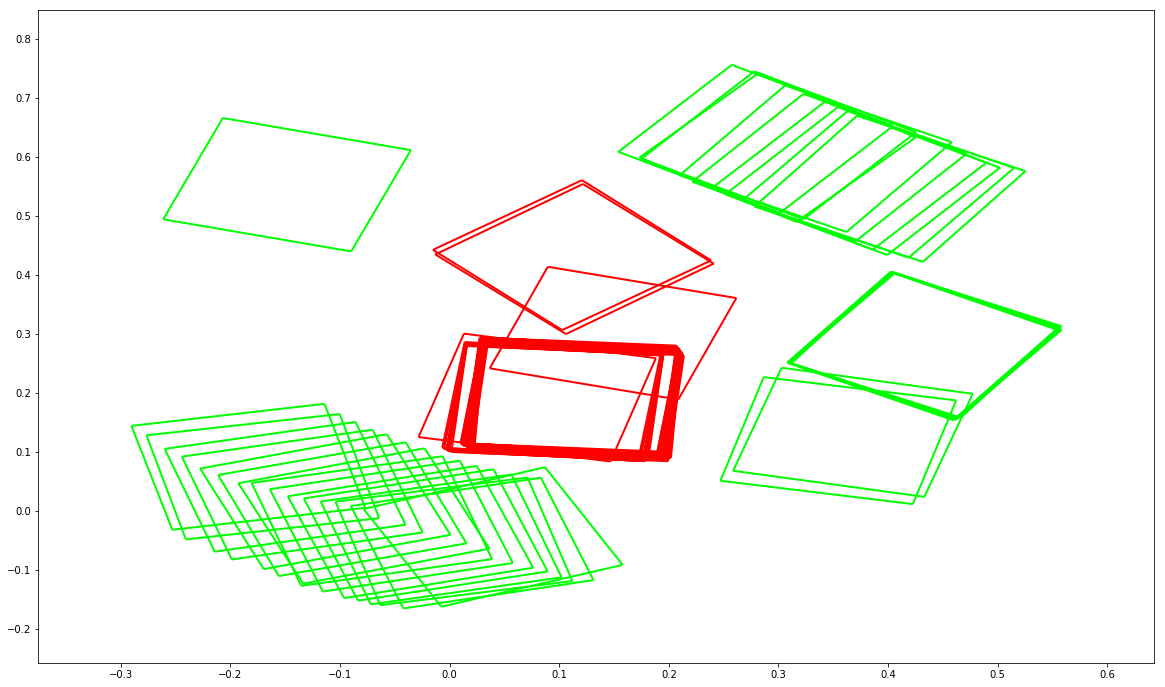

In [10]:
plot(object_data, 835 , 945)

In [11]:
import bisect
def interpolate_object_data( session_len, one_object_data ):
    sorted_keys = sorted(one_object_data.keys())
    for frame in range(session_len):
        if frame not in one_object_data:
            # missing frame
            frame_position = bisect.bisect_left(sorted_keys, frame)

            if frame_position == 0:
                # missing at the beginning
                one_object_data[frame] = one_object_data[sorted_keys[0]]
            elif frame_position == len(sorted_keys):
                # missing at the end
                one_object_data[frame] = one_object_data[sorted_keys[-1]]
            else:
                pre_key = sorted_keys[frame_position - 1]
                nex_key = sorted_keys[frame_position]
                pre = one_object_data[pre_key].transform
                nex = one_object_data[nex_key].transform
                
                p = (frame - pre_key)/(nex_key - pre_key)
                q = (nex_key - frame)/(nex_key - pre_key)
                transfrom = Transform2D ( nex.position * q + pre.position * p , 
                                         nex.rotation * q + pre.rotation * p, 
                                         nex.scale * q + pre.scale * p)
                one_object_data[frame] = Cube2D( transfrom )

In [29]:
interpolate_object_data(2881, object_data['Stella Artois'])
interpolate_object_data(2881, object_data['Shell'])

In [30]:
len(object_data['Stella Artois'])

2881

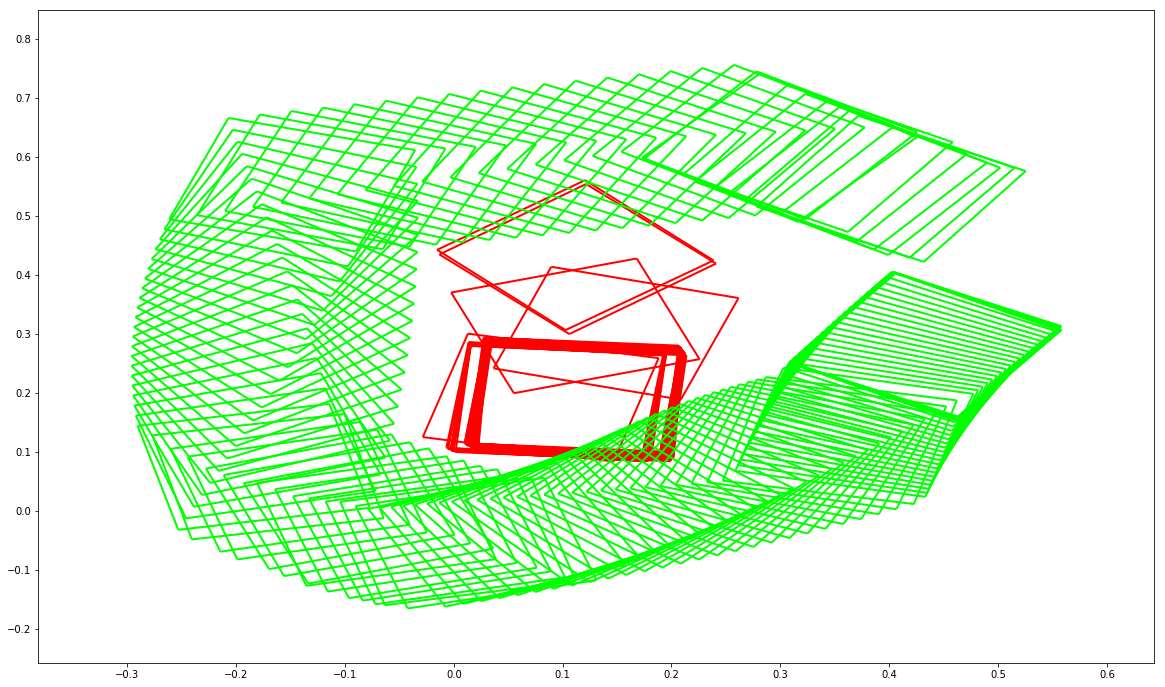

In [31]:
plot(object_data, 835 , 945)

In [17]:
from qsrlib.qsrlib import QSRlib

In [18]:
object_data.keys()

dict_keys(['Shell', 'Stella Artois'])

In [20]:
qsrlib = QSRlib()



AttributeError: 'Cube2D' object has no attribute 'position'

In [24]:
from qsrlib.qsrlib import QSRlib, QSRlib_Request_Message
from qsrlib_io.world_trace import Object_State, World_Trace

from feature.project_table import project_markers, estimate_cube_2d
from utils import SESSION_OBJECTS, SESSION_LEN, BLOCK_SIZE, ROTATION_QUANTIZATION

In [80]:
def qsr_feature_extractor ( qsrlib, object_data, object_1_name, object_2_name, session_len ):
    '''
    feature_selection between two objects
    # of features = 13
    
    8 features here
    (o1.position, o2.position) - cardir, cardir_diff, argd, argd_diff, qtccs 4 features

    -- other features
    
    2 features
    quantized rotation of two objects
    1 feature
    quantized rotation difference between two objects
    2 features
    quantized difference of rotations btw two frames of two objects
    '''
    object_1 = object_data[object_1_name]
    object_2 = object_data[object_2_name]

    o1 = [Object_State(name="o1", timestamp=i, x=object_1[i].transform.position[0][0], y=object_1[i].transform.position[0][1]) 
            for i in range(session_len)]
    o2 = [Object_State(name="o2", timestamp=i, x=object_2[i].transform.position[0][0], y=object_2[i].transform.position[0][1]) 
            for i in range(session_len)]

    world = World_Trace()
    world.add_object_state_series(o1)
    world.add_object_state_series(o2)

    qsrlib_request_message = QSRlib_Request_Message(which_qsr=['cardir', 'argd', 'qtccs'], input_data=world, 
                    dynamic_args = {'cardir': {'qsrs_for': [('o1', 'o2')]},
                                    'argd': {'qsrs_for': [('o1', 'o2')], 
                                            'qsr_relations_and_values' : dict(("" + str(i), i * BLOCK_SIZE / 2) for i in range(20)) },
                                    'qtccs': {'qsrs_for': [('o1', 'o2')], 
                                              'quantisation_factor': 0.001, 'angle_quantisation_factor' : np.pi / 5,
                                              'validate': False, 'no_collapse': True
                                   }})

    # Number of features that you calculate the difference between two consecutive frames
    diff_feature = 2
    try:
        # pretty_print_world_qsr_trace(['cardir', 'mos', 'argd', 'qtccs'], qsrlib_response_message)
        qsrlib_response_message = qsrlib.request_qsrs(req_msg=qsrlib_request_message)

        # (#frame, 8)
        qsr_feature = turn_response_to_features([('o1,o2')], qsrlib_response_message, diff_feature)

        # rotation features
        quantized_r_1 = np.array([object_1[i].transform.rotation // ROTATION_QUANTIZATION for i in range(session_len)])
        quantized_r_2 = np.array([object_2[i].transform.rotation // ROTATION_QUANTIZATION for i in range(session_len)])
        quantized_diff = quantized_r_1 - quantized_r_2
        diff_quantized_r_1 = np.pad(np.ediff1d(quantized_r_1), (1,0), 'constant', constant_values = (0,))
        diff_quantized_r_2 = np.pad(np.ediff1d(quantized_r_2), (1,0), 'constant', constant_values = (0,))

        # column forms
        quantized_r_1.shape = (session_len, 1)
        quantized_r_2.shape = (session_len, 1)
        quantized_diff.shape = (session_len, 1)
        diff_quantized_r_1.shape = (session_len, 1)
        diff_quantized_r_2.shape = (session_len, 1)

        return np.concatenate([qsr_feature, quantized_r_1, quantized_r_2, quantized_diff, diff_quantized_r_1, diff_quantized_r_2], axis = 1)

    except ValueError as e:
        print (e)
        print ('Problem in data of length ' + str(len_data))
        return []

cdid = dict( (u, i) for (i, u) in enumerate( ['n', 'nw', 'w', 'sw', 's', 'se', 'e', 'ne', 'eq'] ))
mosd = dict( (u, i) for (i, u) in enumerate( ['s', 'm'] ))
qtcc_relations = dict( (u, i) for (i, u) in enumerate( ['-', '0', '+'] ))

def cardir_index ( cardir ):
    return cdid [cardir]

def mos_index ( mos ):
    return mosd [mos]

def qtcc_index ( qtcc_relation ):
    return qtcc_relations [qtcc_relation] - 1

'''
diff_feature: number of features at the beginning that need to create difference between two frames
all_feature: total number of features
'''
def turn_response_to_features(keys, qsrlib_response_message, diff_feature):
    feature_chain = []
    for t in qsrlib_response_message.qsrs.get_sorted_timestamps():
        features = []
        # print (qsrlib_response_message.qsrs.trace[t].qsrs.keys())
        for k in keys:
            if k in qsrlib_response_message.qsrs.trace[t].qsrs:
                v = qsrlib_response_message.qsrs.trace[t].qsrs[k]
                
                if 'cardir' in v.qsr:
                    f = v.qsr['cardir']
                    features.append(cardir_index(f))
                if 'argd' in v.qsr:
                    f = int( v.qsr['argd'] )
                    features.append(f)
        # Just to separate qtccs at the end of feature vectors
        
        for k in keys:
            if k in qsrlib_response_message.qsrs.trace[t].qsrs:
                v = qsrlib_response_message.qsrs.trace[t].qsrs[k]
                if 'qtccs' in v.qsr:
                    fs = v.qsr['qtccs']
                    features += [qtcc_index(f) for f  in fs.split(',')]
        
        # print features
        feature_chain.append(features)
    
    if len(feature_chain) == 0:
        return feature_chain

    # The first frame doesn't has qtcc relations
    feature_chain[0] += [0 for i in range(4)]

    feature_chain = np.array(feature_chain)
    
    print (feature_chain.shape)
    # number of features
    f_number = feature_chain.shape[1]

    # Feature that need to calculate diff
    # (#frame, diff_feature)
    need_diff_chain = feature_chain[:, :diff_feature]

    # Get the diff
    # (#frame - 1, diff_feature)
    diff_chain = np.diff(need_diff_chain, n=1, axis = 0)

    # (#frame, diff_feature)
    padded_diff_chain = np.pad(diff_chain, [(1,0), (0,0)], 'constant', constant_values = (0,))

    
    
    # Add for the first frame
    # (#frame, 2 * diff_feature + other_feature)
    diff_feature_chain = np.concatenate ( [need_diff_chain, padded_diff_chain, feature_chain[:, diff_feature:]], axis = 1 )
    
    print ('shape of diff_feature_chain %s' % str(diff_feature_chain.shape))
    return diff_feature_chain

In [81]:
features = qsr_feature_extractor(qsrlib, object_data, 'Stella Artois', 'Shell', 2881)

(2881, 6)
shape of diff_feature_chain (2881, 8)


In [36]:
object_data['Stella Artois'][1]

In [37]:
object_1 = object_data['Stella Artois']

In [39]:
o1 = [Object_State(name="o1", timestamp=i, x=object_1[i].transform.position[0], y=object_1[i].transform.position[1]) 
            for i in range(2881)]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [43]:
i = 0
print (object_1[i].transform.position)
Object_State(name="o1", timestamp=i, x=object_1[i].transform.position[0][0], y=object_1[i].transform.position[0][1]) 

[[ 0.44754734  0.57126873]]


In [61]:
object_1_name = 'Stella Artois'
object_2_name = 'Shell'
session_len = 2881

In [62]:
object_1 = object_data[object_1_name]
object_2 = object_data[object_2_name]

o1 = [Object_State(name="o1", timestamp=i, x=object_1[i].transform.position[0][0], y=object_1[i].transform.position[0][1]) 
        for i in range(session_len)]
o2 = [Object_State(name="o2", timestamp=i, x=object_2[i].transform.position[0][0], y=object_2[i].transform.position[0][1]) 
        for i in range(session_len)]

world = World_Trace()
world.add_object_state_series(o1)
world.add_object_state_series(o2)

In [63]:
qsrlib_request_message = QSRlib_Request_Message(which_qsr=['cardir', 'argd', 'qtccs'], input_data=world, 
                    dynamic_args = {'cardir': {'qsrs_for': [('o1', 'o2')]},
                                    'argd': {'qsrs_for': [('o1', 'o2')], 
                                            'qsr_relations_and_values' : dict(("" + str(i), i * BLOCK_SIZE / 2) for i in range(20)) },
                                    'qtccs': {'qsrs_for': [('o1', 'o2')], 
                                              'quantisation_factor': 0.001, 'angle_quantisation_factor' : np.pi / 5,
                                              'validate': False, 'no_collapse': True
                                   }})

In [64]:
qsrlib_response_message = qsrlib.request_qsrs(req_msg=qsrlib_request_message)

In [65]:
qsrlib_response_message

In [67]:
qsrlib_response_message.qsrs.trace[0].qsrs

{'o1,o2': <qsrlib_io.world_qsr_trace.QSR at 0x2a8c7bd0a20>}

In [84]:
qsr_feature = turn_response_to_features([('o1,o2')], qsrlib_response_message, 2)

(2881, 6)
shape of diff_feature_chain (2881, 8)


In [85]:
quantized_r_1 = np.array([object_1[i].transform.rotation // ROTATION_QUANTIZATION for i in range(session_len)])
quantized_r_2 = np.array([object_2[i].transform.rotation // ROTATION_QUANTIZATION for i in range(session_len)])
quantized_diff = quantized_r_1 - quantized_r_2
diff_quantized_r_1 = np.pad(np.ediff1d(quantized_r_1), (1,0), 'constant', constant_values = (0,))
diff_quantized_r_2 = np.pad(np.ediff1d(quantized_r_2), (1,0), 'constant', constant_values = (0,))

# column forms
quantized_r_1.shape = (session_len, 1)
quantized_r_2.shape = (session_len, 1)
quantized_diff.shape = (session_len, 1)
diff_quantized_r_1.shape = (session_len, 1)
diff_quantized_r_2.shape = (session_len, 1)

In [86]:
qsr_feature.shape

(2881, 8)

In [87]:
u = np.concatenate([qsr_feature, quantized_r_1, quantized_r_2, quantized_diff, diff_quantized_r_1, diff_quantized_r_2], axis = 1)

In [88]:
u.shape

(2881, 13)

In [89]:
features[:20,:]

array([[ 7.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.],
       [ 7.,  4.,  0.,  0., -1.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0., -1.,  1.,  8.,  8.,  0.,  0.,  0.],
       [ 7.,  4.,  0.,  0., -1.,  0.,  0.,  0.,  7.,  8., -1., -1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8., -1.,  0.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  1.,  0.,  8.,  8.,  0.,  1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0., -1.,  8.,  8.,  0.,  0.,  0.],
       [ 7.,  4.,  0.,  0., -1.,  0., -1.,  1.,  7.,  8., -1., -1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0., -1.,  7.,  8., -1.,  0.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8., -1., -1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  1.,  0.,  8.,  8.,  0.,  1.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.],
       [ 7.,  4.,  0.,  0.,  0.,  0., 